In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%load_ext autoreload
%aimport process
%aimport stats
%autoreload 1

# Real Ornstein-Uhlenbeck processes

Let's sample the real Ornstein-Uhlenbeck process

In [2]:
T = 2
N = 200
dt= 0.01
gamma = 1.0
sigma = 0.3
t, samples = process.ornstein_uhlenbeck(T, dt, theta=gamma, sigma=sigma, size=N) # sample N times

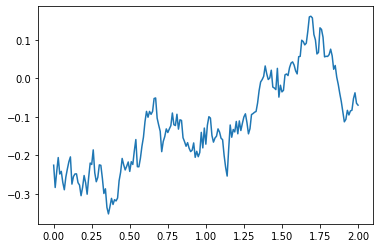

In [3]:
plt.plot(t, samples[0])
plt.show()

## Autocorrelation function

The expected form is 
$$R(τ) = E[X^*(t)X(t+τ)] = \frac{σ^2}{2γ} e^{-γ|τ|}$$

In [4]:
@interact_manual(T=4.0, dt=  (0.01,0.1,0.01), gamma=(0.0,4.0), sigma=(0.0,1.0), N=(1000,10000))
def cou_demo(T, dt, gamma, sigma, N):
    # simulate N times and calculate autocorrelation function
    t, s = process.ornstein_uhlenbeck(T, dt, theta = gamma, sigma=sigma, is_complex=False, size=N)
    autoc = stats.autocorrelation(s)
    autoc = autoc.real
    
    # 2D autocorrelation function
    plt.imshow(autoc, origin='lower', extent=(0,T,0,T))
    plt.xlabel('s')
    plt.ylabel('t')
    plt.show()
    
    # 1D autocorrelation function
    plt.plot(T - t, autoc[-1], label='empirical')
    plt.plot(t, sigma**2/(2*gamma)*np.exp(-gamma*t), label='theoretical')
    plt.legend()
    plt.show()
    
    plt.plot(t, np.var(s,axis=0))
    plt.show()

interactive(children=(FloatSlider(value=4.0, description='T', max=12.0, min=-4.0), FloatSlider(value=0.05, des…

First plot shows $R_{XX}(s,t) = E[X(s)X(t)]$,

second plot shows $R_{XX}(t) = E[X(0)X(t)]$

# Complex Ornstein-Uhlenbeck processes

The complex Ornstein-Uhlenbeck process follows the SDE

$$dX(t) = -(γ + iω)X(t)dt + σdW(t)$$

In [5]:
T = 2
dt= 0.01
gamma = 1.0
omega = 1.0
sigma = 0.3
t, s = process.ornstein_uhlenbeck(T, dt, theta = gamma + omega*1j, sigma=sigma, is_complex=True)

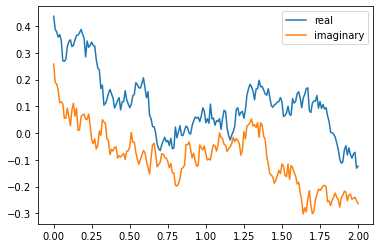

In [6]:
plt.plot(t, s[0].real, label="real")
plt.plot(t, s[0].imag, label="imaginary")
plt.legend()
plt.show()

## Autocorrelation function

The expected form is
$$R(τ) = E[X^*(t)X(t+τ)] = \frac{σ^2}{γ} e^{-γ|τ| - iωτ}$$

In [7]:
@interact_manual(T=2.0, dt=  (0.01,0.1,0.01), gamma=(0.0,5.0), omega=(0.0,10.0), sigma=(0.0,1.0), N=(500,10000))
def cou_demo(T, dt, gamma, omega, sigma, N):
    #simulate N times and calculate autocorrelation function
    t, s = process.ornstein_uhlenbeck(T, dt, theta = gamma + omega*1j, sigma=sigma, is_complex=True, size=N)
    #t, s = process.ornstein_uhlenbeck(T, dt, gamma = gamma, sigma=sigma*np.sqrt(2), is_complex=False, size=N)
    #s = s * np.tile(np.exp(-1j * omega* t),(N,1))
    autoc = stats.autocorrelation(s)
    
    # plot autocorrelation E[X^*(0)X(t)]
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.set_title("abs. value")
    ax1.plot(T-t, np.absolute(autoc[:,-1]), label="empirical")
    ax1.plot(t, sigma**2 / gamma * np.exp(-gamma*t), label="theoretical")
    ax1.legend()
    
    ax2.set_title("angle")
    ax2.plot(t, np.angle(autoc[:,0]), label="empirical")
    ax2.plot(t, -omega*t, label="theoretical")
    ax2.legend()
    plt.show()
    
    # plot 2D autocorrelation E[X^*(s)X(t)]
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.set_title("abs. value")
    ax1.imshow(np.absolute(autoc), origin='lower')
    
    ax2.set_title("angle")
    ax2.imshow(np.angle(autoc), origin='lower')
    plt.show()
    
    plt.plot(t, np.var(s, axis=0))
    plt.show()
    
    # plot one example process
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.set_title("abs. value")
    ax1.plot(t, np.abs(s[0]))
    
    ax2.set_title("angle")
    ax2.plot(t, np.angle(s[0]))
    plt.show()

interactive(children=(FloatSlider(value=2.0, description='T', max=6.0, min=-2.0), FloatSlider(value=0.05, desc…